Create renewal movie with tides at Point Atkinson

In [2]:
from matplotlib import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import netCDF4 as nc
import numpy as np
from salishsea_tools import tidetools, stormtools

from salishsea_tools import (nc_tools,viz_tools)

from nowcast import figures, analyze

import os
import glob
from matplotlib import animation

import datetime

%matplotlib inline

In [3]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2015,12,31)

numdays = (end-start).days
dates = [start + datetime.timedelta(days=num)
             for num in range(0, numdays+1)]

In [8]:
results_home = '/results/SalishSea/nowcast/'
bathy = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

thalweg = np.loadtxt('/data/nsoontie/MEOPAR/tools/bathymetry/thalweg_working.txt', dtype=int, unpack=True)

In [9]:
files = analyze.get_filenames(start,end,'1d','grid_T',results_home)

In [10]:
def combine_files(files, var, jss, iss):

    time = np.array([])
    var_list = []

    for f in files:
        G = nc.Dataset(f)
        var_tmp = G.variables[var][:]
        var_tmp=var_tmp[:,:,jss,iss]
        
        var_list.append(var_tmp)
        t = nc_tools.timestamp(G, np.arange(var_tmp.shape[0]))
        try:
            for ind in range(len(t)):
                t[ind] = t[ind].datetime
        except TypeError:
            t = t.datetime
        time = np.append(time, t)

    var_ary = np.concatenate(var_list, axis=0)
    return var_ary, time

In [11]:
#load 
f = nc.Dataset(files[0])
sal = combine_files(files,'vosaline',thalweg[0],thalweg[1])

#f.variables['vosaline'][:,:,thalweg[0],thalweg[1]]

zlevels = f.variables['deptht']

In [13]:
time = sal[1]
sal=sal[0]
framess = sal.shape[0]
framess

x, z = np.meshgrid(np.arange(thalweg.shape[1]), zlevels)

print(framess)

365


In [16]:
#Making an initial image i.e. our first ssh reading
def init():
    return axl
    
#The full range of images that will make up the animation
def thalweg_tides(t):
    axl.clear()
    sal_tzyx = np.ma.masked_values(sal[t, :,:], 0)
    
    cs = [26,27,28,29,30,30.2,30.4,30.6,30.8,31,32,33,34]
    mesh=axl.contourf(x,-z,sal_tzyx,cs,cmap=cmap,extend='both')
    
    timestamp = time[t]
    axl.set_title(timestamp.strftime('%d-%b-%y %H:%M'))
    axl.set_xlabel('X Index')
    axl.set_ylabel('Depth [m]')
    axl.text(50,-400,'Strait of \n Juan de Fuca')
    axl.text(670,-430,'Strait of \n Georgia')
    #axl.add_patch(patches.Rectangle(
    #    (450, 0),   # (x,y)
    #    255,          # width
    #    -350,          # height
    #fill=False,edgecolor='r',linewidth=2)
#)

    return mesh

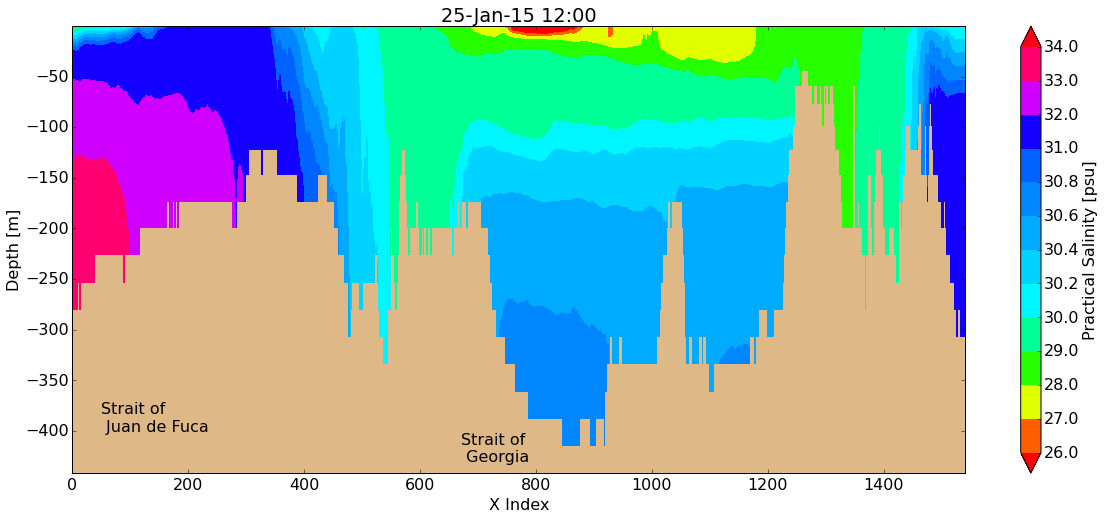

In [17]:
#Setting up a blank figure
fig, axl = plt.subplots(1, 1, figsize=(20, 8))
land_colour = 'burlywood'
axl.set_axis_bgcolor(land_colour)

font = {'size'   :16}

plt.rc('font', **font)

smin, smax, dels = 26, 34, 0.5
cmap = plt.get_cmap('hsv')
cmap.set_bad(land_colour)
mesh = thalweg_tides(24)
cbar = plt.colorbar(mesh, ax=axl)
cbar.set_ticks([26,27,28,29,30,30.2,30.4,30.6,30.8,31,32,33,34])
cbar.set_label('Practical Salinity [psu]')



       

In [18]:
  

#The animation function    
anim = animation.FuncAnimation(fig, thalweg_tides,frames=framess, blit=True, repeat=True)

#A line that makes it all work
mywriter = animation.FFMpegWriter(fps=5)

#Save in current folder
anim.save('ThalwegSal_Animation_2015.mp4',writer=mywriter,bitrate=-1,dpi=200)

#Show as a pop-up window
#plt.show()

/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/nsoontie/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


IndexError: integer sequences in slices must be sorted and cannot have duplicates

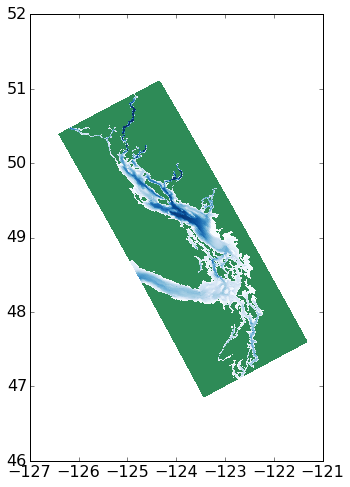

In [14]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')

lats = grid.variables['nav_lat']
lons = grid.variables['nav_lon']
bathy = grid.variables['Bathymetry']

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
viz_tools.set_aspect(ax, coords='map', lats=lats)
cmap = plt.get_cmap('Blues')
cmap.set_bad('SeaGreen')
mesh = ax.pcolormesh(lons[:], lats[:], bathy[:], cmap=cmap)
ax.plot(lons[thalweg[0,:],thalweg[1,:]],lats[thalweg[0,:],thalweg[1,:]],marker='.',color='k')
#iss=450; iee=706
#ax.plot(lons[thalweg[0,iss:iee],thalweg[1,iss:iee]],lats[thalweg[0,iss:iee],thalweg[1,iss:iee]],
#        marker='.',color='r')
iss=0; iee=300
ax.plot(lons[thalweg[0,iss:iee],thalweg[1,iss:iee]],lats[thalweg[0,iss:iee],thalweg[1,iss:iee]],
        marker='.',color='y')
iss=300; iee=600
ax.plot(lons[thalweg[0,iss:iee],thalweg[1,iss:iee]],lats[thalweg[0,iss:iee],thalweg[1,iss:iee]],
        marker='.',color='b')



ax.set_xlim([-126,-122])
ax.set_ylim([47,51])

ax.tick_params(\
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

ax.tick_params(\
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='off',      # ticks along the bottom edge are off
    right='off',         # ticks along the top edge are off
    labelleft='off') # labels along the bottom edge are off


In [18]:
fig.savefig('diff_thalweg.png',dpi=300)